In [1]:
import pandas as pd

In [43]:
def read_excel(excel_path, tab):
    df = pd.read_excel(excel_path, tab)
    df.index = pd.to_datetime(df['DATETIME'])
    del df['DATETIME']
    return df

def drown_factor(h1, h2, m):
    #https://help.autodesk.com/view/IWICMS/2024/ENU/?guid=GUID-66F0B502-4BE9-428A-A2CD-D43047B2093C
    f = ((1 - h2 / h1) / (1 - m))**0.5
    if f < 0.3:
         f = (1 - h2 / h1) / (0.3 * (1 - m))
    return f


In [65]:
excel_path = './data/data.xlsx'
tab = 'ND15930.2'
# tab = 'VORTEX'
df = read_excel(excel_path, tab)

# ND15930.2

- Weir elevation = 93.87 #ft
- head discharge table = B021


In [66]:
invert = 93.87
rc_name = 'B021'
m = 0.9
df['flow'] = df['US flow (MGD)']
# because velocity is 0 in the results
df['us_head'] = df['US total head (ft AD)'] - invert
df['h1'] = df['US depth (ft)']
df['h2'] = df['DS depth (ft)']
df['h_diff'] = df['h1'] - df['h2']
df['drownf'] = df.apply(lambda x: drown_factor(x['h1'], x['h2'], m), axis=1)
df['flow_rc'] = df['flow']/df['drownf']


C:\Users\mengm\AppData\Local\Temp\ipykernel_8440\2084102384.py:9: RuntimeWarning: invalid value encountered in double_scalars
  f = ((1 - h2 / h1) / (1 - m))**0.5


In [67]:
rc = pd.read_excel(excel_path, rc_name)

Text(0.5, 1.0, 'rating curve vs us head')

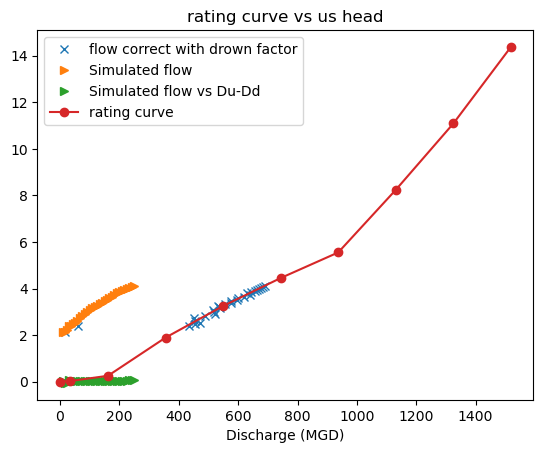

In [68]:
ax = df.plot(x='flow_rc', y='h1', label='flow correct with drown factor', style='x')
df.plot(x='flow', y='h1', label='Simulated flow', style='>', ax=ax)
df.plot(x='flow', y='h_diff', label='Simulated flow vs Du-Dd', style='>', ax=ax)

rc.plot(x='Discharge (MGD)', y='Head (ft)', style='o-', ax=ax, label='rating curve')
ax.set_title('rating curve vs us head')
# ax.set_xlim(0,300)
# ax.set_ylim(0, 6)

(0.0, 2.0)

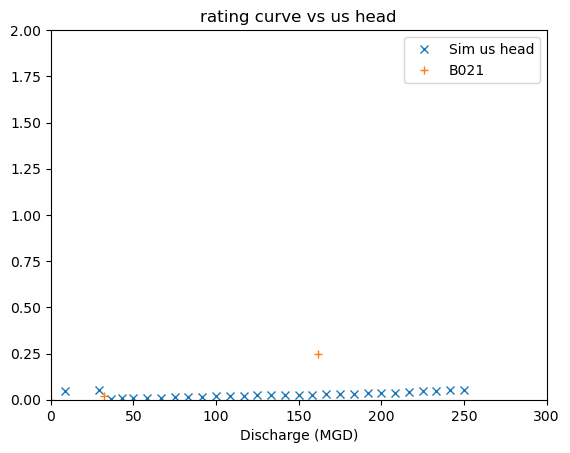

In [71]:
ax = df.plot(x='flow', y='h_diff', label='Sim us head', style='x')
rc.plot(x='Discharge (MGD)', y='Head (ft)', style='+', label=rc_name, ax=ax)
ax.set_title('rating curve vs us head')
ax.set_xlim(0,300)
ax.set_ylim(0, 2)

Text(0.5, 1.0, 'us depth =us head-invert')

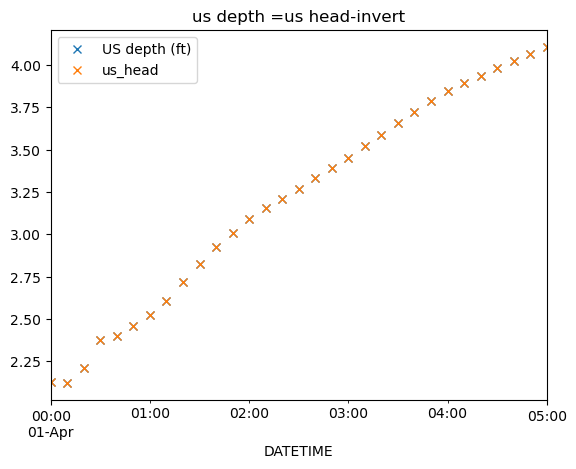

In [70]:
ax = df.loc[:, ['US depth (ft)', 'us_head']].plot(style='x')
ax.set_title('us depth =us head-invert')

Text(0.5, 1.0, 'US/DS flow are the same')

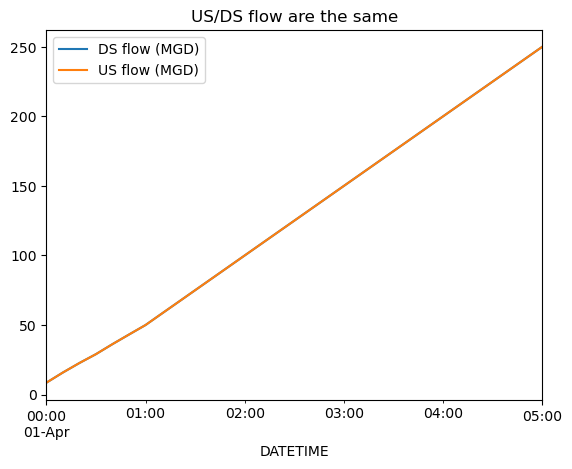

In [8]:
ax = df.loc[:, ['DS flow (MGD)', 'US flow (MGD)']].plot()
ax.set_title('US/DS flow are the same')

In [9]:
df.head()

,DS depth (ft),DS flow (MGD),DS Froude number,DS total head (ft AD),DS velocity (ft/s),Hydraulic gradient,Surcharge state,US depth (ft),US flow (MGD),US Froude number,US total head (ft AD),US velocity (ft/s),Infiltration loss (MGD),Lateral inflow (MGD),Volume (US Mgal),flow,us_head,head_diff
DATETIME,,,,,,,,,,,,,,,,,,
2023-04-01 00:00:00,2.080,8.4951,0,95.950,0,0,1,2.127,8.4951,0,95.997,0,0,0,0,8.4951,2.127,0.047
2023-04-01 00:10:00,2.181,15.8295,0,96.051,0,0,1,2.124,15.8295,0,95.994,0,0,0,0,15.8295,2.124,-0.057
2023-04-01 00:20:00,2.258,22.6597,0,96.128,0,0,1,2.208,22.6597,0,96.078,0,0,0,0,22.6597,2.208,-0.050
2023-04-01 00:30:00,2.325,29.0271,0,96.195,0,0,1,2.377,29.0271,0,96.247,0,0,0,0,29.0271,2.377,0.052
2023-04-01 00:40:00,2.393,36.2322,0,96.263,0,0,1,2.399,36.2322,0,96.269,0,0,0,0,36.2322,2.399,0.006
